# Sprint セグメンテーション1

## 1.このSprintについて

### Sprintの目的
- コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ

### どのように学ぶか
公開されている実装を用いてKaggleコンペティションのデータでセグメンテーションを行います。

## 2.セグメンテーション

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)

セグメンテーション手法としてU-Net[1]を使います。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)

### kaggleからデータダウンロードして解凍

In [ ]:
!pip install kaggle

In [1]:
# 自分のマイドライブにマウントする
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
mkdir .kaggle

In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json
token = {"username":"satoshi30","key":"c9acaedf1938a7a9e107714c65f1f0c9"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
pwd

'/content'

In [ ]:
ls -a .kaggle

./  ../  kaggle.json


In [ ]:
mkdir /root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# kaggle APIコマンドが使えるかどうかを確認
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        291           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        127           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        365           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2396           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17993           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4757            True  
connectx

In [ ]:
# カレントディレクトリの変更
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
%mkdir TGSSalt_data

In [ ]:
# カレントディレクトリの変更
%cd /content/drive/My Drive/TGSSalt_data

/content/drive/My Drive/TGSSalt_data


In [ ]:
# sデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/c/tgs-salt-identification-challenge/data

!kaggle competitions download -c tgs-salt-identification-challenge

 96% 156M/163M [00:01<00:00, 94.3MB/s]
100% 163M/163M [00:01<00:00, 94.0MB/s]
 87% 33.0M/37.9M [00:01<00:00, 18.5MB/s]
100% 37.9M/37.9M [00:01<00:00, 20.2MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 62.5MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 5.17MB/s]
 96% 209M/217M [00:03<00:00, 96.1MB/s]
100% 217M/217M [00:03<00:00, 70.5MB/s]
 85% 35.0M/41.4M [00:00<00:00, 35.0MB/s]
100% 41.4M/41.4M [00:00<00:00, 76.7MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 36.5MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/TGSSalt_data/train.zip -d /content/drive/'My Drive'/TGSSalt_data/unzip_train

In [ ]:
!unzip /content/drive/'My Drive'/TGSSalt_data/test.zip -d /content/drive/'My Drive'/TGSSalt_data/unzip_test

In [ ]:
!unzip /content/drive/'My Drive'/TGSSalt_data/flamingo.zip -d /content/drive/'My Drive'/TGSSalt_data/unzip_flamingo

In [ ]:
!ls -a

competition_data.zip  sample_submission.csv  train.zip	     unzip_train
depths.csv	      test.zip		     unzip_flamingo
flamingo.zip	      train.csv		     unzip_test


In [ ]:
import pandas as pd
depths_df = pd.read_csv('depths.csv')
display(depths_df.head())
len(depths_df)

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


22000

In [ ]:
sample_submission_df = pd.read_csv('sample_submission.csv')
display(sample_submission_df.head())
len(sample_submission_df)

,id,rle_mask
0,155410d6fa,1 1
1,78b32781d1,1 1
2,63db2a476a,1 1
3,17bfcdb967,1 1
4,7ea0fd3c88,1 1


18000

In [ ]:
train_df = pd.read_csv('train.csv')
display(train_df.head())
len(train_df)

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


4000

In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_train/
!ls -a

/content/drive/My Drive/TGSSalt_data/unzip_train
images	masks


In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_train/images
!ls -a

(101, 101)
[  0   1   6   7   8  10  11  12  13  14  15  17  18  20  22  23  25  26
  27  30  32  35  36  38  39  40  42  43  44  46  47  48  50  51  52  54
  55  56  58  59  60  62  63  64  65  67  68  69  70  71  72  73  75  76
  77  78  79  80  81  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  99 100 101 102 103 104 105 107 108 109 110 111 112 113 115 116 117
 118 119 120 121 123 124 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 229 230 231 232 233
 234 235 236 237 239 240 241 245 246 248 249 250 251 253 255]


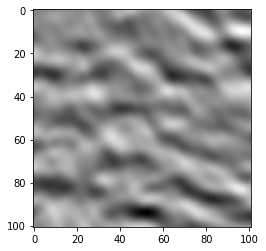

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
img = Image.open('000e218f21.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_train/masks
!ls -a

(101, 101)
[0]


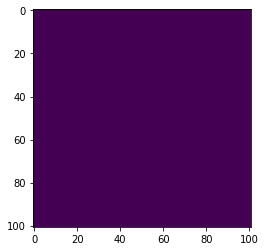

In [ ]:
img = Image.open('000e218f21.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

(101, 101)
[    0 65535]


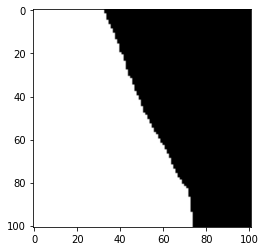

In [ ]:
# img = Image.open('000e218f21.png')
img = Image.open('68b593f903.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

- maskがうまく出力されない画像は、0からの配列になっている

In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_test
!ls -a

/content/drive/My Drive/TGSSalt_data/unzip_test
images


In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_test/images
!ls -a

(101, 101)
[  0   1   2   3  10  11  12  15  17  19  20  21  25  26  27  29  31  32
  33  34  35  36  37  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 233 234 235 236 238 240 244 246 247 252 254]


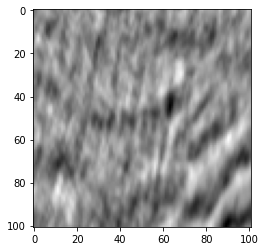

In [ ]:
img = Image.open('0005bb9630.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_flamingo
!ls -a

/content/drive/My Drive/TGSSalt_data/unzip_flamingo
__MACOSX  train


In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_flamingo/train
!ls -a

/content/drive/My Drive/TGSSalt_data/unzip_flamingo/train
images	masks


In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_flamingo/train/images
!ls -a

(101, 101)
[  0   1   6   7   8  10  11  12  13  14  15  17  18  20  22  23  25  26
  27  30  32  35  36  38  39  40  42  43  44  46  47  48  50  51  52  54
  55  56  58  59  60  62  63  64  65  67  68  69  70  71  72  73  75  76
  77  78  79  80  81  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  99 100 101 102 103 104 105 107 108 109 110 111 112 113 115 116 117
 118 119 120 121 123 124 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 229 230 231 232 233
 234 235 236 237 239 240 241 245 246 248 249 250 251 253 255]


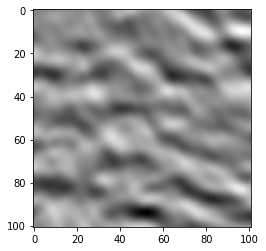

In [ ]:
img = Image.open('000e218f21.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

In [ ]:
%cd /content/drive/My Drive/TGSSalt_data/unzip_flamingo/train/masks
!ls -a

(101, 101)
[0]


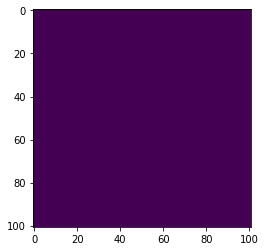

In [ ]:
img = Image.open('000e218f21.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

- flamingoの中に入っているデータはtrainと一緒？　詳細不明のため、学習にはtrainのみ使う

### 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

*《GPU環境での学習》*

大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。

*《新たなデータセットの適用》*

公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [ ]:
#　カレントディレクトリの変更
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
# githubからクローン
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 26.71 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (253/253), done.


In [ ]:
%cd /content/drive/My Drive/unet/data/membrane/train/aug

/content/drive/My Drive/unet/data/membrane/train/aug


In [ ]:
!ls -a

(256, 256)
[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 244 245 246 248 255

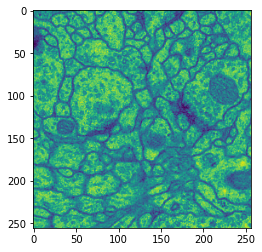

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np

img = Image.open('image_0_6144147.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

(256, 256)
[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 244 245 246 248 255

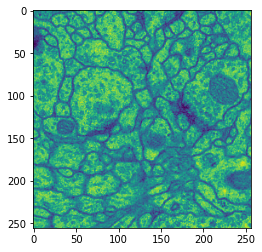

In [ ]:
img = Image.open('image_0_9312159.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

(256, 256)
[  0 255]


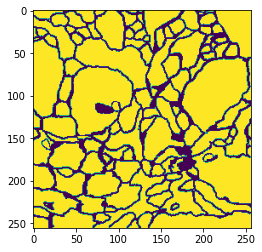

In [ ]:
img = Image.open('mask_0_6144147.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

(256, 256)
[  0 255]


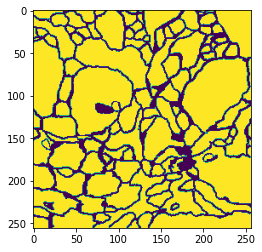

In [ ]:
img = Image.open('mask_0_9312159.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

In [ ]:
%cd /content/drive/My Drive/unet/data/membrane/train/image
!ls -a

/content/drive/My Drive/unet/data/membrane/train/image
0.png	12.png	15.png	18.png	20.png	23.png	26.png	29.png	4.png  7.png
10.png	13.png	16.png	19.png	21.png	24.png	27.png	2.png	5.png  8.png
11.png	14.png	17.png	1.png	22.png	25.png	28.png	3.png	6.png  9.png


(512, 512)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

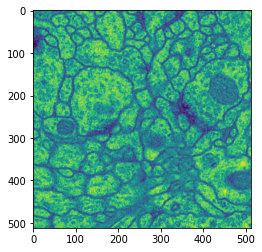

In [ ]:
img = Image.open('0.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

In [ ]:
%cd /content/drive/My Drive/unet/data/membrane/train/label
!ls -a

/content/drive/My Drive/unet/data/membrane/train/label
0.png	12.png	15.png	18.png	20.png	23.png	26.png	29.png	4.png  7.png
10.png	13.png	16.png	19.png	21.png	24.png	27.png	2.png	5.png  8.png
11.png	14.png	17.png	1.png	22.png	25.png	28.png	3.png	6.png  9.png


(512, 512)
[  0 255]


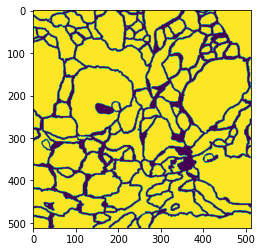

In [ ]:
img = Image.open('0.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

In [ ]:
%cd /content/drive/My Drive/unet/data/membrane/test
!ls -a

/content/drive/My Drive/unet/data/membrane/test
0.png		15.png		20.png		26.png		4.png
0_predict.png	15_predict.png	20_predict.png	26_predict.png	4_predict.png
10.png		16.png		21.png		27.png		5.png
10_predict.png	16_predict.png	21_predict.png	27_predict.png	5_predict.png
11.png		17.png		22.png		28.png		6.png
11_predict.png	17_predict.png	22_predict.png	28_predict.png	6_predict.png
12.png		18.png		23.png		29.png		7.png
12_predict.png	18_predict.png	23_predict.png	29_predict.png	7_predict.png
13.png		19.png		24.png		2.png		8.png
13_predict.png	19_predict.png	24_predict.png	2_predict.png	8_predict.png
14.png		1.png		25.png		3.png		9.png
14_predict.png	1_predict.png	25_predict.png	3_predict.png	9_predict.png


(512, 512)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

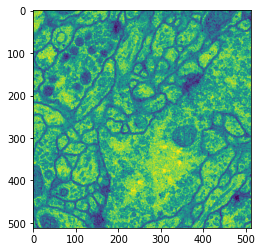

In [ ]:
img = Image.open('0.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

(256, 256)
[    0     1     2 ... 65533 65534 65535]


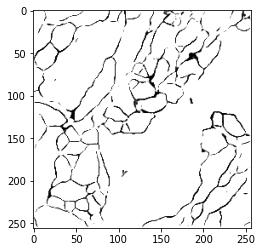

In [ ]:
img = Image.open('0_predict.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(np.unique(img_array))

#### [trainUnet.ipynb](https://github.com/zhixuhao/unet/blob/master/trainUnet.ipynb)をもとに動かしてみる

In [ ]:
%cd /content/drive/My Drive/unet

/content/drive/My Drive/unet


In [ ]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from model import *
from data import *

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
1999/2000 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9163
Epoch 00001: loss improved from inf to 0.19038, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 104s 52ms/step - loss: 0.1904 - accuracy: 0.9163
Epoch 2/5
1999/2000 [============================>.] - ETA: 0s - loss: 0.1228 - accuracy: 0.9461
Epoch 00002: loss improved from 0.19038 to 0.12280, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 103s 52ms/step - loss: 0.1228 - accuracy: 0.9461
Epoch 3/5
2000/2000 [==============================] - ETA: 0s - loss: 0.0958 - accuracy: 0.9582
Epoch 00003: loss improved from 0.12280 to 0.09577, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 104s 52ms/step - loss: 0.0958 - accuracy: 0.9582
Epoch 4/5
1999/2000 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 

- 学習させて重みの保存を確認できた

#### TGSSaltのデータを学習・推定させてみる

In [ ]:
# TGSSaltデータをunetへ移動
%mv /content/drive/"My Drive"/TGSSalt_data/ /content/drive/"My Drive"/unet/

In [ ]:
%cd /content/drive/My Drive/unet/

/content/drive/My Drive/unet


In [ ]:
!ls -a

data		   .git     main.py	 README.md	  unet_membrane.hdf5
dataPrepare.ipynb  img	    model.py	 TGSSalt_data	  unet_tgssalt.hdf5
data.py		   LICENSE  __pycache__  trainUnet.ipynb


In [ ]:
%cd /content/drive/My Drive/unet/TGSSalt_data

/content/drive/My Drive/unet/TGSSalt_data


In [ ]:
# 拡張された画像を保存するディレクトリ作成
!mkdir TGSSalt_aug

In [ ]:
# 結果を保存するディレクトリ作成
!mkdir TGSSalt_results

In [ ]:
%cd /content/drive/My Drive/unet/

/content/drive/My Drive/unet


main.py, data.pyを書き換える
- pathの指定
- augデータの保存
- 関数adjustData内のmaskの値設定方法の変更
- predict_dataの保存名称の設定方法の変更
- predictしたデータをnumpyで保存
- predictの出力を30から5に減らす

In [ ]:
!python main.py

2020-09-30 14:00:18.251062: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-30 14:00:19.701587: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-30 14:00:19.733987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-30 14:00:19.734712: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-09-30 14:00:19.734767: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-30 14:00:19.736855: I tensorflow/stream_executor/plat

(256, 256)
(256, 256)
[  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 221 222 223 224 225 227 228 230 231 234 235 238 241 246 255]


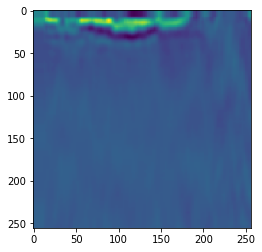

In [ ]:
# 拡張したデータを表示
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img = Image.open('TGSSalt_data/TGSSalt_aug/image_1004_3709175.png')
plt.imshow(img)

print(img.size)

img_array = np.array(img)
print(img_array.shape)
print(np.unique(img_array))

(256, 256)
(256, 256)
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 114 115 116 119 122]


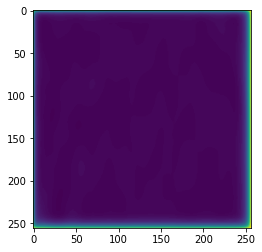

In [ ]:
# result
img = Image.open('TGSSalt_data/TGSSalt_results/13bd6b4cb5_predict.png')
plt.imshow(img)
print(img.size)

img_array = np.array(img)
print(img_array.shape)
print(np.unique(img_array))

In [ ]:
predict_array = np.load('/content/drive/My Drive/unet/TGSSalt_data/TGSSalt_results/predict_array.npy')
predict_array.shape

(5, 256, 256, 1)

In [ ]:
np.unique(predict_array[0])

array([0.04040745, 0.04042368, 0.04042955, ..., 0.4520278 , 0.46509528,
       0.47551352], dtype=float32)

[0.04040745 0.04042368 0.04042955 ... 0.4520278  0.46509528 0.47551352]


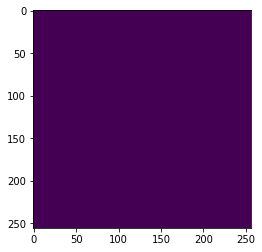

[0.05606883 0.05608805 0.05609307 ... 0.45529142 0.46711183 0.47709757]


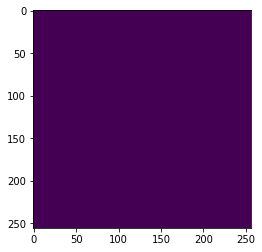

[0.03248033 0.03248531 0.03248726 ... 0.4471558  0.4612987  0.4732542 ]


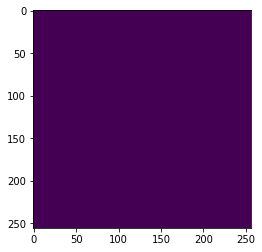

[0.03550049 0.03554503 0.03556249 ... 0.45438132 0.4655828  0.4766989 ]


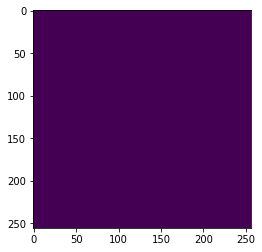

[0.03960041 0.03960341 0.0396118  ... 0.454643   0.46752977 0.4768047 ]


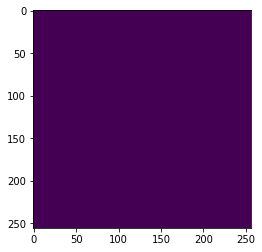

In [ ]:
for predict in predict_array:
  print(np.unique(predict))
  mask_predict = np.where(predict>0.5, 1, 0).reshape(256, 256)
  plt.imshow(mask_predict)
  plt.show()

- 学習はできていることが確認できた
- 予測値にばらつきが少なくなっている、epoch数をあげれば改善できるか？

### 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

- downsamplingしていく過程とupsamplingしていく過程に分かれている
    - downsampling（以下を繰り返す）
        - conv3x3の畳み込みを3回
            - copy(upsampling時にmerge)
        - maxpool2x2
    - upsampling（以下を繰り返し、downsamplingで縮小させたpixelを拡大していく）
        - up-conv 2x2
            - 2x2でサイズを拡張した後に畳み込みを行っている
            - コード例
            ```
            up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
            ```
        - crop
            - up-conv 2x2 の出力と、downsamplingの　conv3x3の出力結果をmerge
            - コード例
            ```
            merge6 = concatenate([drop4,up6], axis = 3)
            ```
        - conv3x3の畳み込みを3回

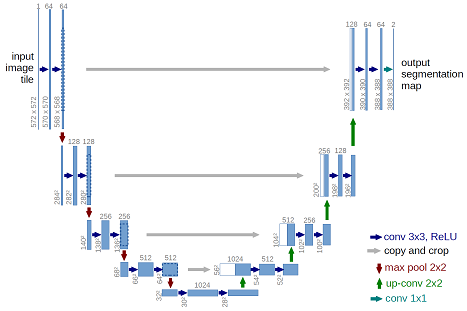

In [3]:
from IPython.display import Image,display_png
display_png(Image('/content/drive/My Drive/unet/img/u-net-architecture.png'))